In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
%run connect_four_game.py
%run constants.py

In [5]:
# run a random based game with possibility of statistics matrix usage
def run_random_game(win_pos=None):
    global x_wins
    global o_wins
    global draws
    global win_pos_x
    global win_pos_o
    game = ConnectFourGame()

    # initialize player number, move counter
    player = 1
    mvcntr = 1

    # initialize flag that indicates win
    no_winner_yet = True

    while game.move_still_possible() and no_winner_yet:
        # get player symbol
        name = symbols[player]
        #print '%s moves' % name
        
        # give player 1 possibility to move basing on statistics
        # let player move at random
        if player == 1:
            game.make_move(player, win_pos=win_pos)
        else:
            game.make_move(player)
        # print current game state
        #game.print_game_state()

        # evaluate game state
        if game.move_was_winning_move():
            #print 'player %s wins after %d moves' % (name, mvcntr)
            no_winner_yet = False
            if player == 1:
                x_wins += 1
                win_pos_x[game.game_state == 1] +=1
            else:
                o_wins += 1
                win_pos_o[game.game_state == -1] +=1
#             print game.game_state
#             print '\n'
        # switch player and increase move counter
        player *= -1
        mvcntr += 1

    if no_winner_yet:
        # print 'game ended in a draw'
        draws += 1

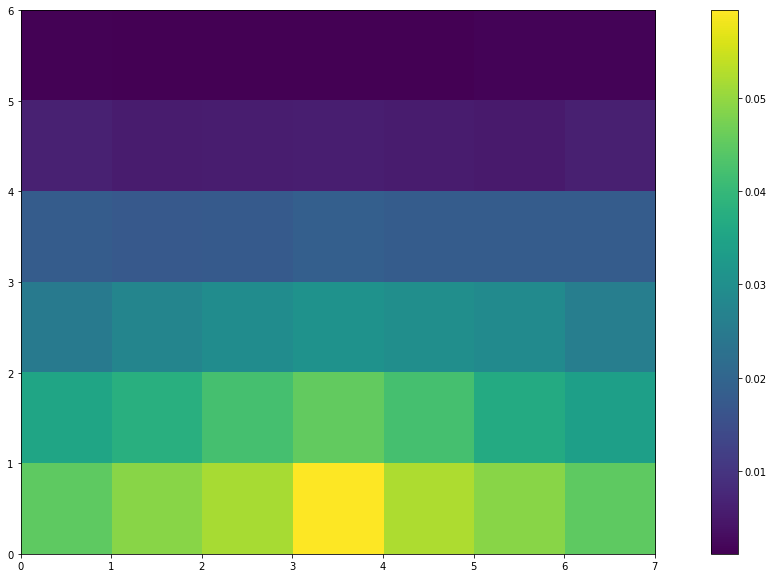

In [26]:
# visualize distribution of auspicious moves for X
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_wins, o_wins, draws = 0, 0, 0 
win_pos_x = np.zeros((n_rows, n_columns), dtype=int)
win_pos_o  = np.zeros((n_rows, n_columns), dtype=int)
for i in range(10000):
    run_random_game()
# calculate coefficient to normalize matrix
plt.figure(figsize = (20,10))
plt.imshow(win_pos_x/np.sum(win_pos_x).astype(float), extent=[0, 7, 0, 6])
plt.colorbar()

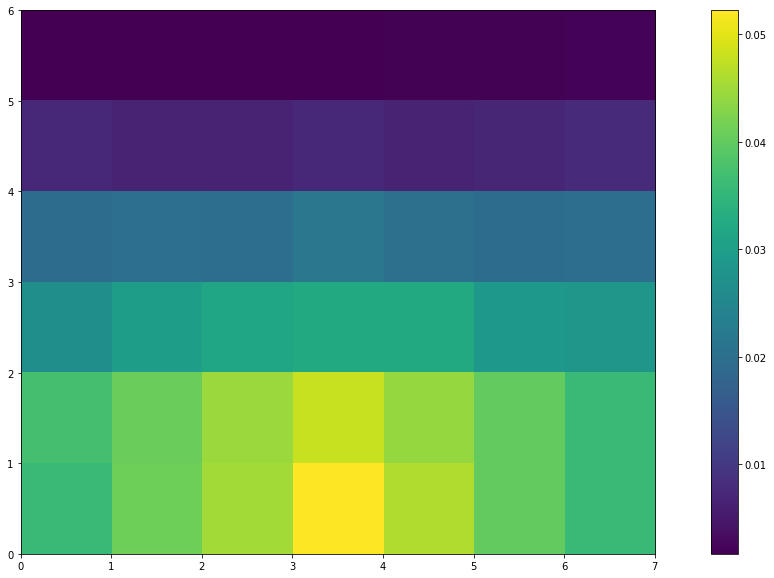

In [27]:
# visualize distribution of auspicious moves for O
plt.figure(figsize = (20,10))
# matrix is normalized based on max value of matrix for player X
# this way it is more obvious that X wins in most cases
plt.imshow(win_pos_o/np.sum(win_pos_o).astype(float), extent=[0, 7, 0, 6])
plt.colorbar()

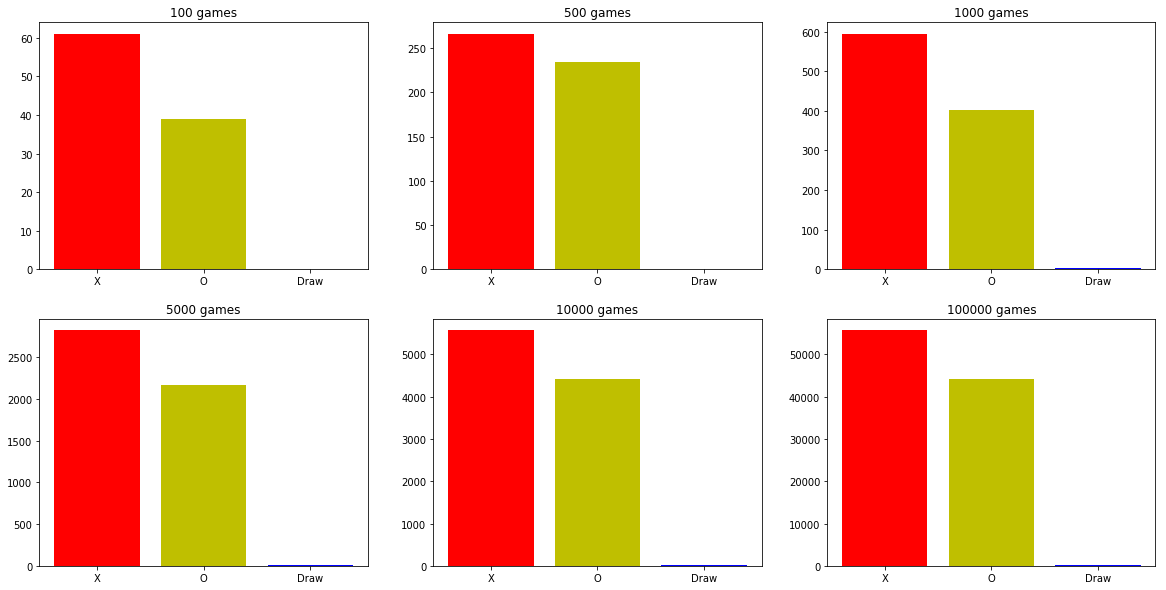

In [259]:
# visualize number of wins, loses and draws in fully randomized game
import matplotlib.pyplot as plt
plt.subplots(2, 3, figsize=(20, 10))

games_num = [100, 500, 1000, 5000, 10000, 100000]
k = 1
for i in games_num:
    x_wins, o_wins, draws = 0, 0, 0 
    for j in range(i):
        run_random_game()
    x = np.arange(3)
    res = [x_wins, o_wins, draws]
    plt.subplot(2, 3, k)
    k+=1
    plt.bar(x, res,color=['r', 'y', 'b'])
    plt.xticks(x, ('X', 'O', 'Draw'))
    plt.title(str(i) + ' games')  

plt.show()

In [30]:
# collect statistics 
x_wins, o_wins, draws = 0, 0, 0 
win_pos_x = np.zeros((n_rows, n_columns), dtype=int)
win_pos_o  = np.zeros((n_rows, n_columns), dtype=int)
for i in range(100000):
    run_random_game()

In [31]:
# show statistics matrix
win_pos = np.copy(win_pos_x)
win_pos = win_pos_x/np.sum(win_pos_x).astype(float)
np.set_printoptions(precision=4)
print win_pos

[[0.0014 0.0014 0.0014 0.0014 0.0014 0.0014 0.0015]
 [0.006  0.0059 0.0059 0.0062 0.0057 0.0059 0.006 ]
 [0.0173 0.018  0.0178 0.0192 0.0179 0.0177 0.0178]
 [0.0253 0.0279 0.0299 0.0313 0.03   0.0278 0.0255]
 [0.0348 0.0379 0.0413 0.0448 0.0412 0.0377 0.035 ]
 [0.0456 0.0485 0.0523 0.0594 0.0524 0.0491 0.0452]]


In [32]:
# play 1000 statistics based games
x_wins, o_wins, draws = 0, 0, 0 
win_pos_x = np.zeros((n_rows, n_columns), dtype=int)
win_pos_o  = np.zeros((n_rows, n_columns), dtype=int)
for i in range(1000):
    run_random_game(win_pos)

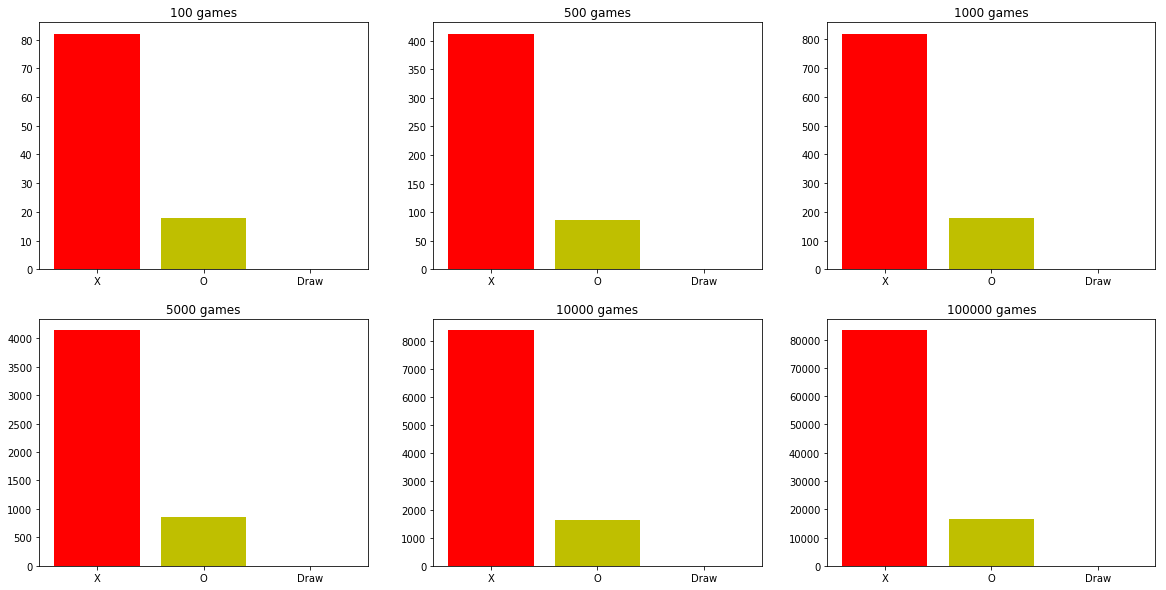

In [33]:
# visualize number of wins, loses and draws 
# for statistics based choice of column for X
# and random choice for O
import matplotlib.pyplot as plt
plt.subplots(2, 3, figsize=(20, 10))

games_num = [100, 500, 1000, 5000, 10000, 100000]
k = 1
for i in games_num:
    x_wins, o_wins, draws = 0, 0, 0 
    for j in range(i):
        run_random_game(win_pos)
    x = np.arange(3)
    res = [x_wins, o_wins, draws]
    plt.subplot(2, 3, k)
    k+=1
    plt.bar(x, res,color=['r', 'y', 'b'])
    plt.xticks(x, ('X', 'O', 'Draw'))
    plt.title(str(i) + ' games')

plt.show()